# Atmosphere Escape Notebook

This notebook contains calculations for the atmosphere escape lectures

1 - Computation of the Exobase

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Computation of Exobase

The concept of Exobase is related to that of the mean free path: at the Exobase the mean free path of a molecule is comparable to the scale height. A molecule travelingaway from Earth at the Exobase will not collide with other molecules and either escape or fall back ballistically to the Exobase. Below the Exobase collisions are dominating the dynamics of molecules and the velocity distribution is then Maxwellian. Above the Exobase molecules are in ballistic orbits. 

To compute the Exobase we use the p and T profile of the atmosphere

In [12]:
# Data contained in the US NRL file from NRLNSISE00
# 1  Height, km
# 2  O, cm-3 
# 3  N2, cm-3
# 4  O2, cm-3
# 5  Mass_density, g/cm-3
# 6  Temperature_neutral, K
# 7  Temperature_exospheric, K
# 8  He, cm-3 
# 9  Ar, cm-3
# 10  H, cm-3
# 11  N, cm-3
# 12  Anomalous_Oxygen, cm-3
def read_file(atm_file):
    #atm_file = 'nrlmsise00_Bologna_22Mar2022.lst'
    a = np.loadtxt(atm_file,skiprows=39)
    h = np.copy(a[:,0])
    t = np.copy(a[:,5])
    #te = np.copy(a[:,6])
    nn2 = np.copy(a[:,2])
    no2 = np.copy(a[:,3])
    no = np.copy(a[:,1])
    nhe = np.copy(a[:,7])
    nar = np.copy(a[:,8])
    nh = np.copy(a[:,9])
    nn = np.copy(a[:,10])
    ntot = (nn2+no2+no+nhe+nar+nh+nn)
    return h, t, nn2, no2, no, nhe, nar, nh, nn, ntot

h, t, nn2, no2, no, nhe, nar, nh, nn, ntot = read_file('nrlmsise00_Bologna_22Mar2022.lst')
h_n, t_n, nn2_n, no2_n, no_n, nhe_n, nar_n, nh_n, nn_n, ntot_n = read_file('nrlmsise00_Bologna_22Mar2022_h200.lst')

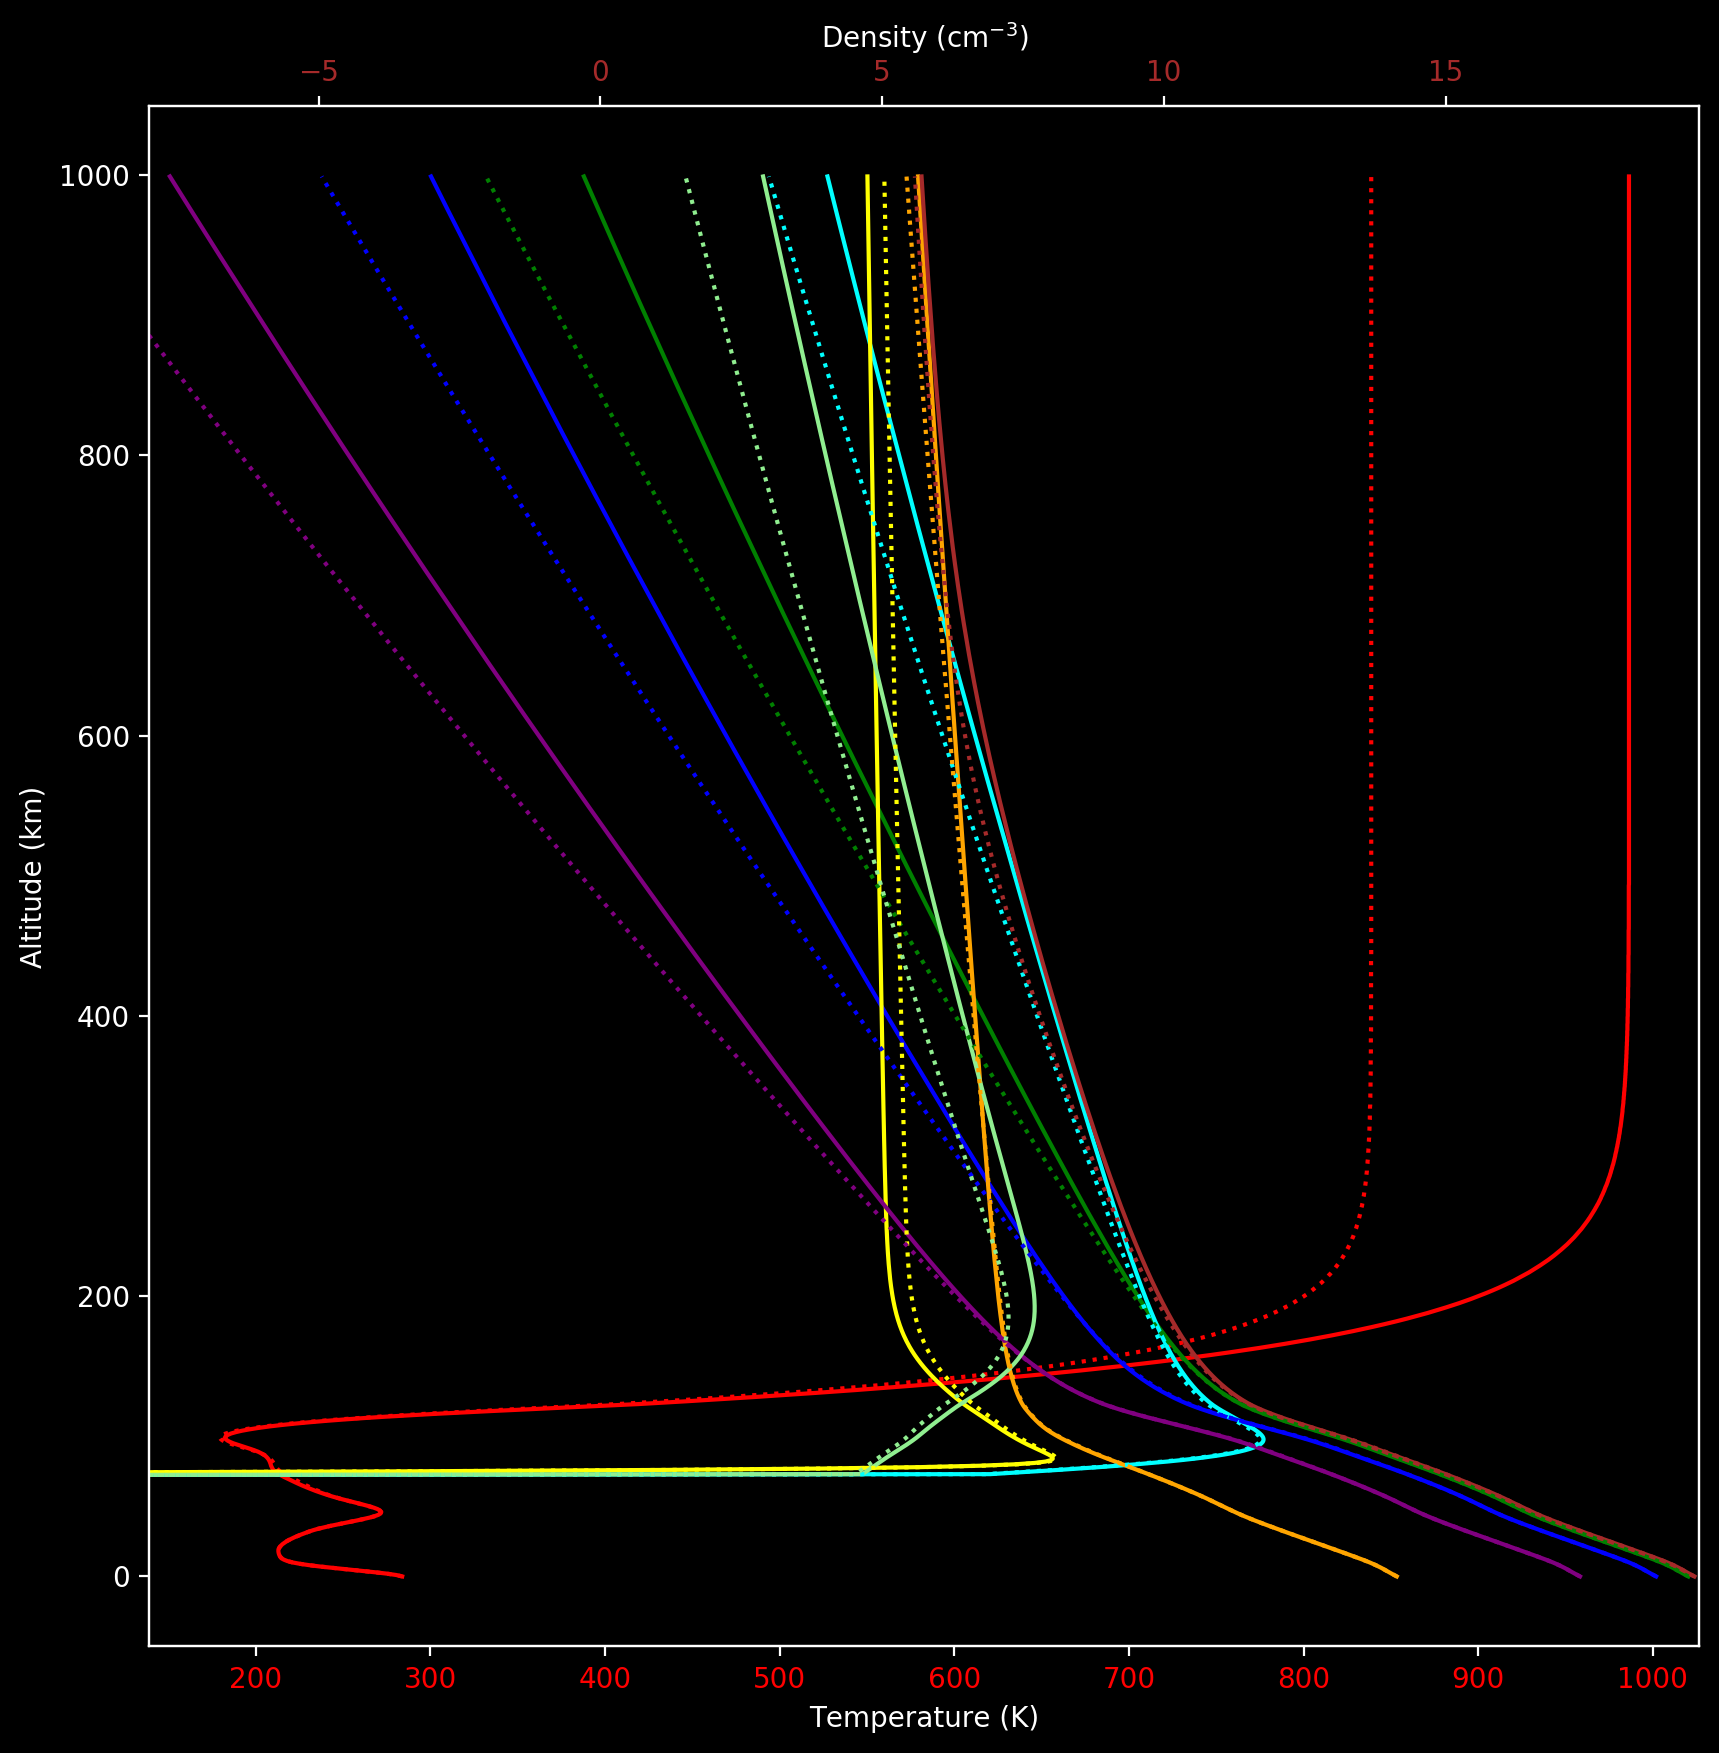

In [3]:
fig, ax = plt.subplots(figsize=(10,10))

def plot_t(ax, h, t, linestyle='solid'):
    # Plot linear sequence, and set tick labels to the same color
    #ax.plot(t, h, color='r')
    ax.plot(t, h, color='r', linestyle=linestyle)
    

def plotall(ax, h, nn2, no2, no, nhe, nar, nh, nn, ntot, linestyle='solid'):
    # Plot linear sequence, and set tick labels to the same color
    ax.plot(np.log10(nn2), h, color='green',linestyle=linestyle)
    ax.plot(np.log10(no+1.e-20), h, color='cyan',linestyle=linestyle)
    ax.plot(np.log10(no2), h, color='b',linestyle=linestyle)
    ax.plot(np.log10(nh+1.e-20), h, color='yellow',linestyle=linestyle)
    ax.plot(np.log10(nhe), h, color='orange',linestyle=linestyle)
    ax.plot(np.log10(nar), h, color='purple',linestyle=linestyle)
    ax.plot(np.log10(nn+1.e-20), h, color='lightgreen',linestyle=linestyle)
    ax.plot(np.log10(ntot), h, color='brown',linestyle=linestyle)
    

plot_t(ax, h, t, linestyle='solid')
plot_t(ax, h_n, t_n, linestyle='dotted')
ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Altitude (km)')
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twiny()

# Plot sequence, set scale to logarithmic and change tick color
plotall(ax2, h, nn2, no2, no, nhe, nar, nh, nn, ntot, linestyle='solid')
plotall(ax2, h_n, nn2_n, no2_n, no_n, nhe_n, nar_n, nh_n, nn_n, ntot_n, linestyle='dotted')

ax2.set_xlim(-8,19.5)
ax2.tick_params(axis='x', labelcolor='brown')
ax2.set_xlabel('Density (cm$^{-3}$)')

plt.show()

In [18]:
def l_mfp(n,d):
    # Calculation of the mean free path using lambda = 1./(sqrt(2)*pi*d^2*n) with n number density
    # and using the perfect gas equation of state p=n*kb*T
    kb=1.38e-23
    return 1./(np.sqrt(2.)*n*np.pi*d*d)


Text(0.5, 0, '$\\lambda_{mfp}$/h')

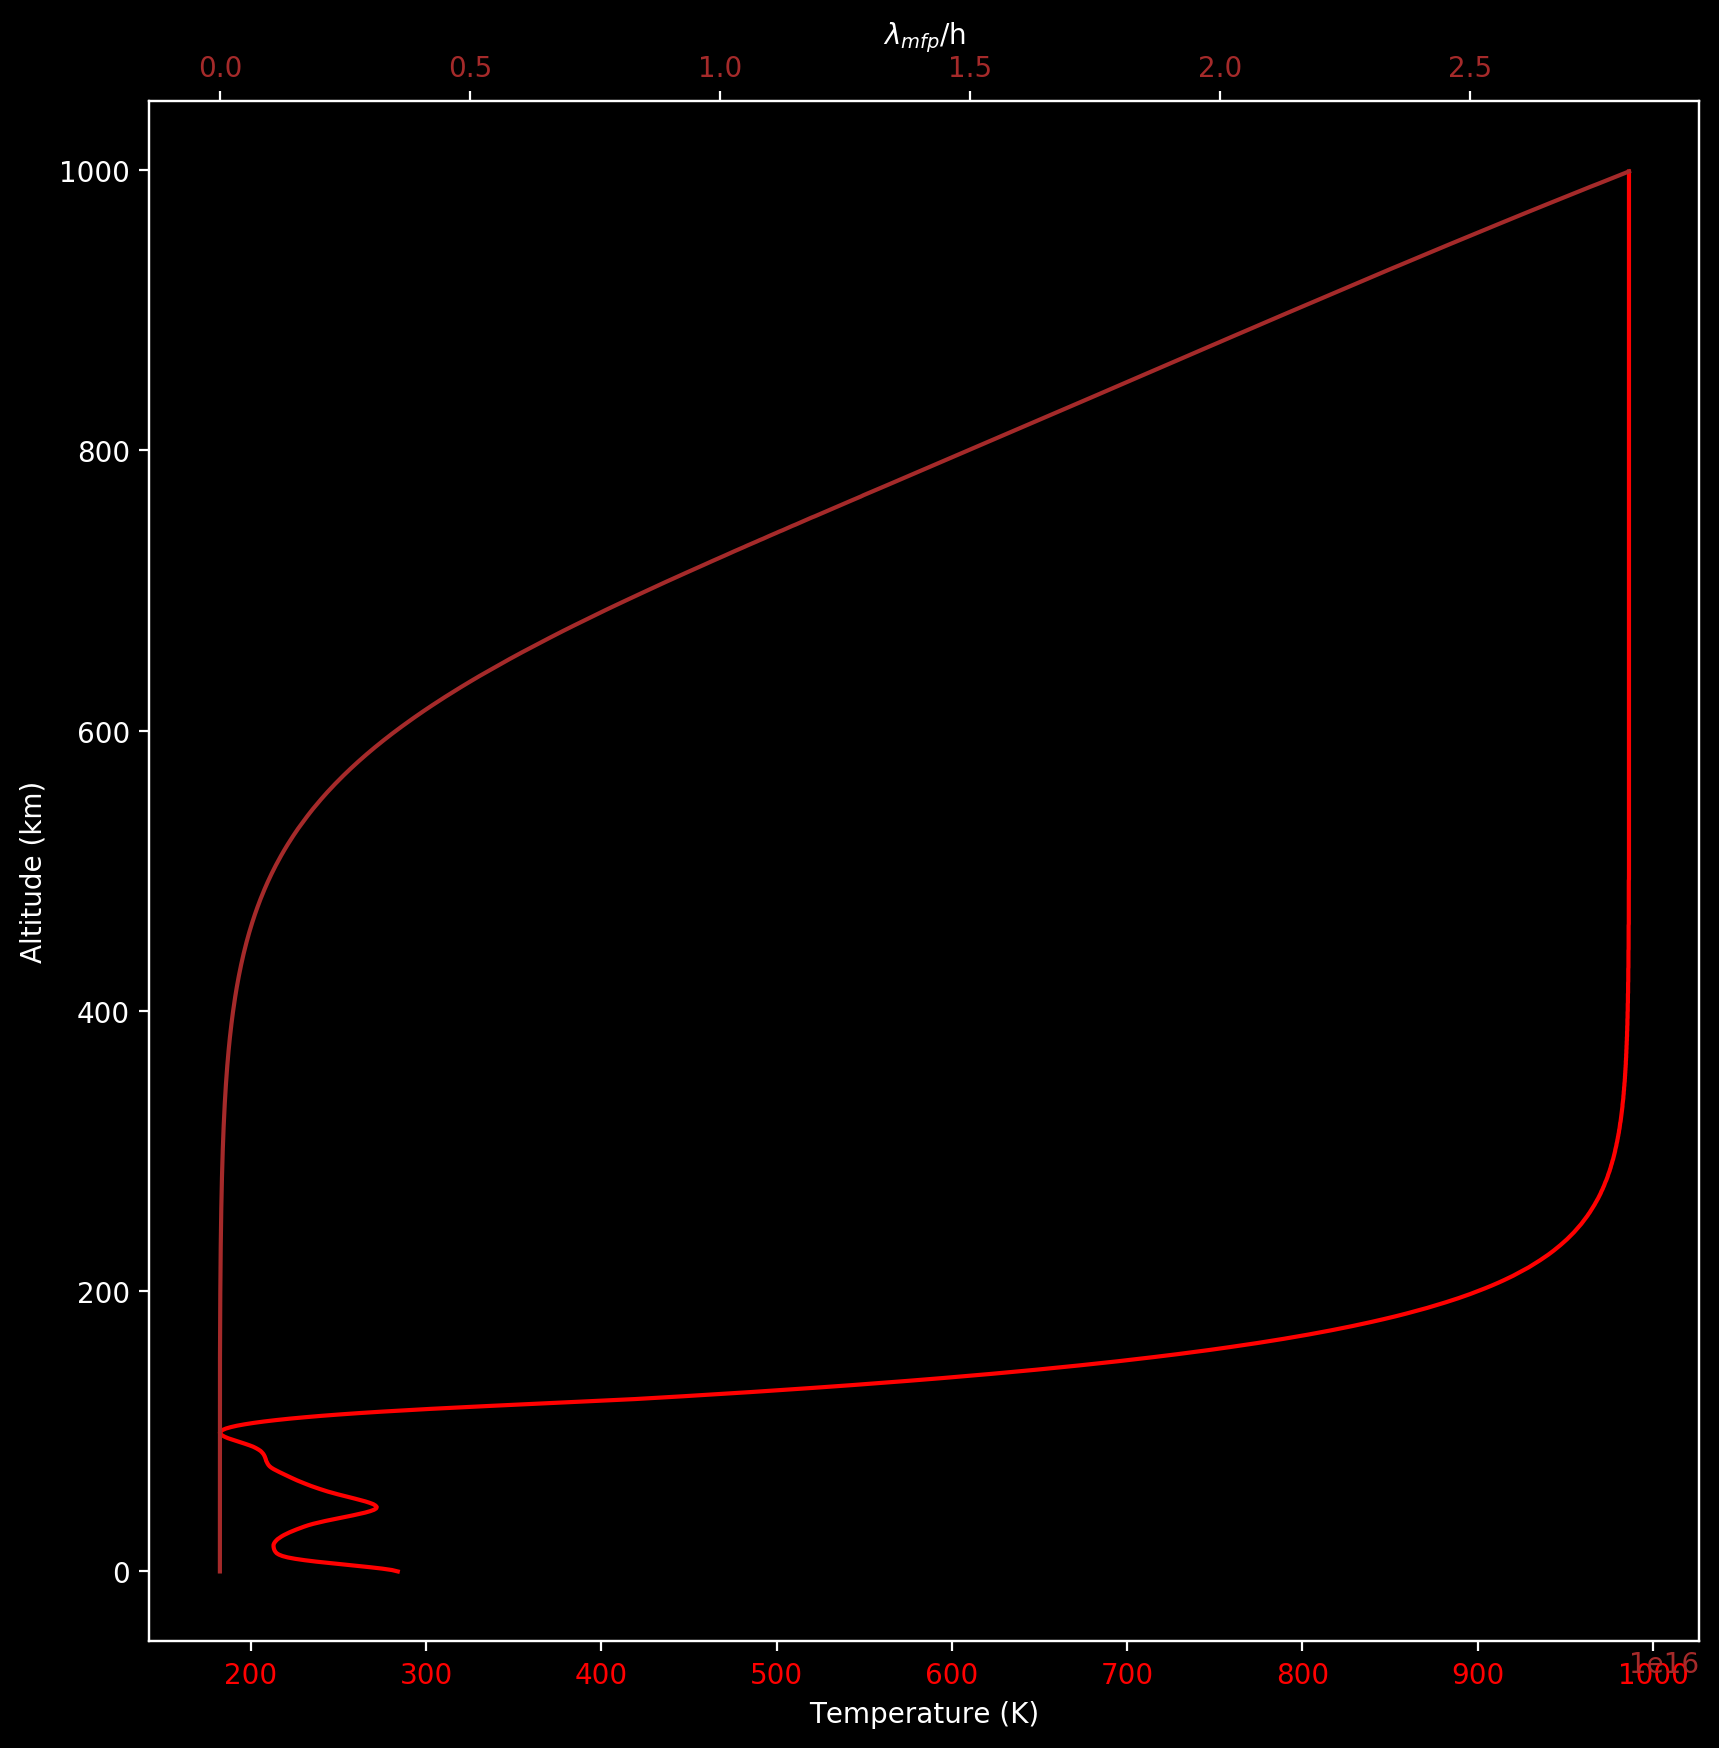

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(t, h, color='r', linestyle='solid')
ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Altitude (km)')

ax2 = ax.twiny()
lmfph = l_mfp(ntot*1.e-6,0.4e-9)/(h*1.e3+1)
ax2.plot(lmfph, h, color='brown',linestyle='solid')
#ax2.set_xlim(-8,19.5)
ax2.tick_params(axis='x', labelcolor='brown')
ax2.set_xlabel('$\lambda_{mfp}$/h')
#lmfph